Project: Best restaurant business model for Inverters.
Authour: Vishnu Kandhappan


In [1]:
## Code block to read the data file from IBM cloud
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_794b9c02fed74be686fcb41cccb7122c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jCjFkWl7jV02dSTWJ9igLejyHnecb4CDo30nnUGPwK4q',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_794b9c02fed74be686fcb41cccb7122c.get_object(Bucket='capestone-donotdelete-pr-n88ivb0lneedsc',Key='data_file.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,id,name,latitude,longitude,locality_verbose,cuisines,average_cost_for_two,price_range,aggregate_rating,votes,all_reviews_count,photo_count,establishment,establishment_types
0,19074290,Metro Eat Out,13.050120,80.212319,Vadapalani/ Chennai,Beverages/ Fast Food,150,1,0.0,2,0,1,Beverage Shop,NaN
1,19242216,Udipi Ganesh Bhavan,13.049919,80.213263,Vadapalani/ Chennai,South Indian,150,1,0.0,1,0,0,Quick Bites,NaN
2,18647947,Asima Briyani Multicuisine Restaurant,13.050009,80.211793,Vadapalani/ Chennai,Biryani/ Chinese/ North Indian/ Chettinad,700,2,3.7,138,64,79,Casual Dining,NaN
3,19318920,Ambur Ajib Briyani,13.048982,80.211934,Vadapalani/ Chennai,Biryani/ Chinese,200,1,3.2,9,6,0,Quick Bites,NaN
4,67274,Ambur Star Biryani,13.049978,80.213546,Vadapalani/ Chennai,Biryani/ North Indian/ Chinese/ Chettinad/ Ara...,700,2,3.8,272,85,24,Quick Bites,NaN


Install Missing modules

In [2]:
!pip install folium

     |████████████████████████████████| 92kB 6.5MB/s eta 0:00:011


In [3]:
import folium
from folium import plugins
from folium.plugins import HeatMap

Visialize the restaurant hotspots

In [5]:

m = folium.Map([13.0509304, 80.2120661], tiles='cartodbpositron',zoom_start=18)
for index, row in df_data_1.iterrows():
    if row["locality_verbose"] == 'Vadapalani/ Chennai':
        folium.CircleMarker(location=[row["latitude"], row["longitude"]],radius=4,color='green').add_to(m)
m


In [6]:
vadapalani_restaurants= df_data_1.query('locality_verbose == "Vadapalani/ Chennai"')



In [7]:
m.add_child(plugins.HeatMap(vadapalani_restaurants[['latitude', 'longitude']].values, radius=15))


In [8]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from scipy.spatial.distance import cdist
import numpy as np

1 : 0.0025117835534546407
2 : 0.0020506766597564664
3 : 0.0015232955871046475
4 : 0.0011869551802043052
5 : 0.0010224334037516078
6 : 0.0008622752284231951
7 : 0.0007652068799792774
8 : 0.0006939323530299959
9 : 0.0006453049188259356
10 : 0.0005923587869715321
11 : 0.0005510672922351045
12 : 0.0005277871783322273
13 : 0.0004902747350711083
14 : 0.0004371580065504865


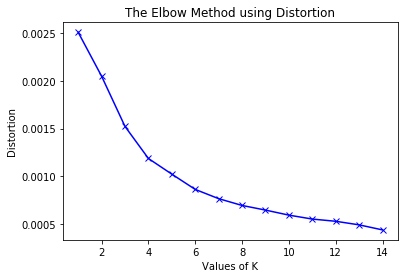

In [9]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15) 

X= vadapalani_restaurants[['latitude', 'longitude']].values

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()


In [11]:
KMeans(init = "k-means++", n_init = 12)
kmean = KMeans().fit(X)
k_means_labels = kmean.labels_
k_means_labels
k_means_cluster_centers = kmean.cluster_centers_
k_means_cluster_centers

array([[13.04884148, 80.2082236 ],
       [13.05097406, 80.21276589],
       [13.04932685, 80.2111593 ],
       [13.0519027 , 80.20977844],
       [13.04574742, 80.21307729],
       [13.04986316, 80.21434873],
       [13.05342961, 80.21158987],
       [13.05174762, 80.20771513]])

<h1>With the help of K mean clustering I have spotted a centroides as a best spot to open a restaurent here I have used Elbow method to finnd the least variance which fits this model

In [12]:
places = pd.DataFrame(columns=['latitude','longitude'])
for i in range(len(k_means_cluster_centers)):
    places.loc[i]=k_means_cluster_centers[i]
places

,latitude,longitude
0,13.048841,80.208224
1,13.050974,80.212766
2,13.049327,80.211159
3,13.051903,80.209778
4,13.045747,80.213077
5,13.049863,80.214349
6,13.053430,80.211590
7,13.051748,80.207715


In [17]:
m1 = folium.Map([13.0509304, 80.2120661], tiles='cartodbpositron',zoom_start=18)
for index, row in places.iterrows():
        folium.CircleMarker(location=[row["latitude"], row["longitude"]],radius=5,color='red').add_to(m1)
m1


In [39]:
hotel_type=df_data_1.drop(columns = ['id', 'name','latitude','longitude','locality_verbose','establishment','establishment_types']) 

In [19]:
hotel_type.head()

,cuisines,average_cost_for_two,price_range,aggregate_rating,votes,all_reviews_count,photo_count
0,Beverages/ Fast Food,150,1,0.0,2,0,1
1,South Indian,150,1,0.0,1,0,0
2,Biryani/ Chinese/ North Indian/ Chettinad,700,2,3.7,138,64,79
3,Biryani/ Chinese,200,1,3.2,9,6,0
4,Biryani/ North Indian/ Chinese/ Chettinad/ Ara...,700,2,3.8,272,85,24


In [41]:
hotel_type=hotel_type.groupby('cuisines').sum()

In [44]:
hotel_type.sort_values(by='votes', ascending=False).head()

,average_cost_for_two,price_range,aggregate_rating,votes,all_reviews_count,photo_count
cuisines,,,,,,
North Indian/ Chinese/ Chettinad/ Seafood,1000,3,4.7,5073,4038,595
North Indian/ Continental/ Kebab/ BBQ,1600,3,4.2,1619,716,821
South Indian/ Biryani,1750,6,9.7,1421,862,115
North Indian/ South Indian/ Desserts/ Beverages/ Mithai,1650,6,10.8,1351,709,349
Irish/ Finger Food,2500,4,4.3,1146,551,432


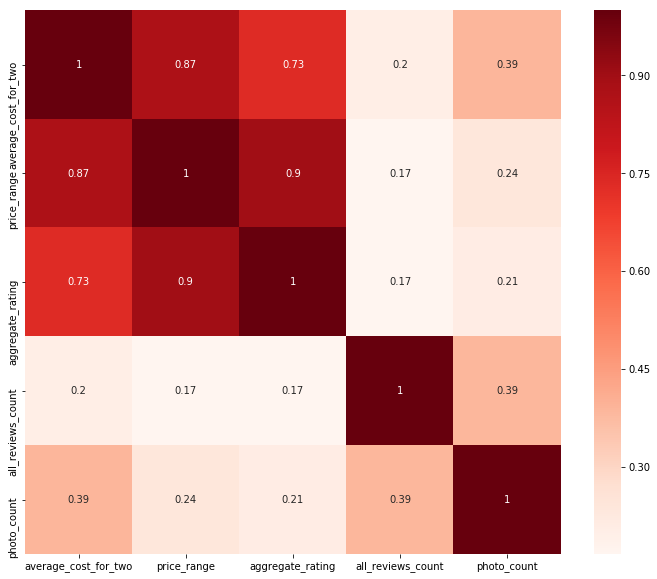

In [45]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
cor = hotel_type[['average_cost_for_two','price_range','aggregate_rating','all_reviews_count','photo_count']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [49]:
hotel_type.query('aggregate_rating > 4').groupby('price_range').sum().sort_values(by='votes', ascending=False).head()

,average_cost_for_two,aggregate_rating,votes,all_reviews_count,photo_count
price_range,,,,,
3,22400,138.8,10584,7057,5219
4,32800,90.2,6583,3502,4955
6,13640,67.7,4019,2201,2525
5,10700,79.0,1993,1016,693
2,7850,87.5,1659,1012,771


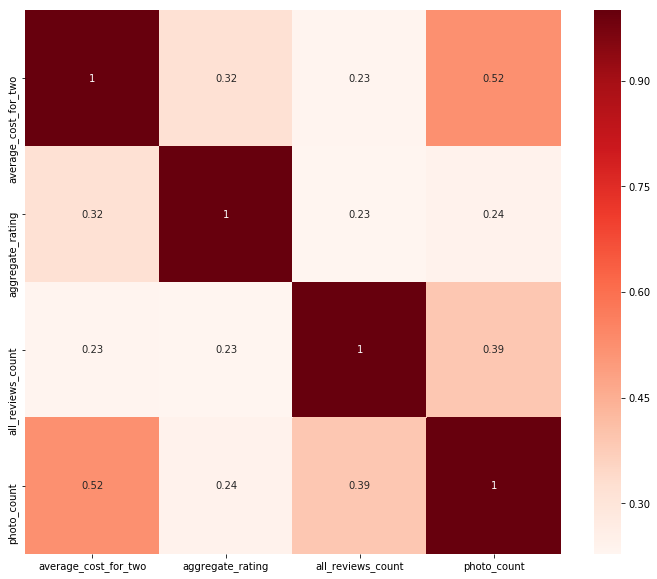

(500, 270)